C:\Users\tbala\AppData\Local\Temp\ipykernel_31000\2255932456.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  #deleting missing data


R^2 Score: 0.6341189942328371
Mean Squared Error: 2806426667.247853


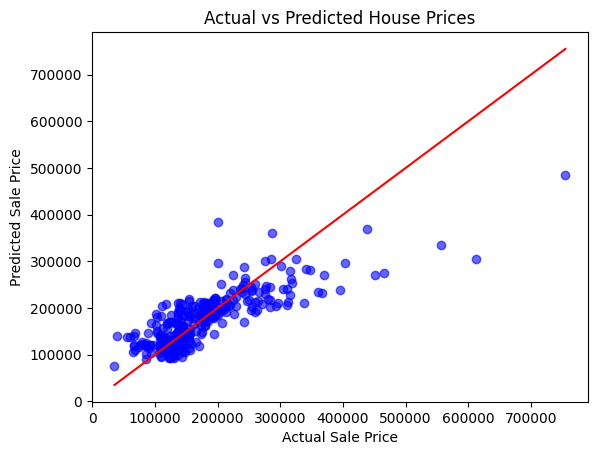

Text(0.5, 1.0, 'Residual Plot')

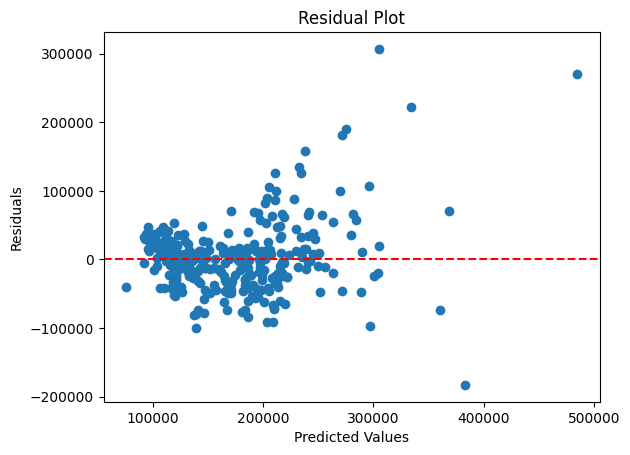

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('train.csv') 


df = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']] #features


df.dropna(inplace=True)  #deleting missing data


X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']   #target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #splitting the dataset into test and training sets 


model = LinearRegression()  # creating a linear regression model
model.fit(X_train, y_train)  #populating the model


y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))        #calculating rsquare score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))   #calculating mean squared error

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")


#plotting the model
